# Práctica: Modelos computacionales de la actividad neuronal

## El modelo Hodgkin-Huxley

Los potenciales de acción son fluctuaciones de voltaje autopropagadas que se producen al abrirse y cerrarse los canales iónicos dependientes de voltaje. El modelo de Hodgkin-Huxley describe 3 canales iónicos, dos de los cuales contienen puertas dependientes del voltaje:

* **Canal de Na⁺ regulado por voltaje** con 2 puertas dependientes de voltaje (`m` y `h`)
* **Canal de K⁺ activado por voltaje** con 1 puerta dependiente de voltaje (`n`)
* **Canal de fuga K⁺** sin puerta

Las conductancias de los canales activados por voltaje dependen de la actividad de las puertas. La actividad de la puerta depende del voltaje y del tiempo. Las puertas se abren y cierran exponencialmente con constantes temporales (`alfa` y `beta`) que dependen del voltaje. El voltaje es una función de la suma de las corrientes de los canales y está influenciado por la capacitancia.

![](https://github.com/swharden/HHSharp/blob/master/dev/theory.png?raw=true)

Aunque podemos definir cada uno de estos elementos como una ecuación individual, en conjunto estas ecuaciones dependen unas de otras (lo que las convierte en un conjunto de _ecuaciones diferenciales_). El modelo de Hodgkin-Huxley utiliza un conjunto de cuatro ecuaciones diferenciales para describir el voltaje de una neurona:

$C\frac{dV}{dt} = -(\bar{g}_{Na} m^{3} h (V -E_{Na}) + \bar{g}_{K} n^{4} (V-E_K) + g_{leak} (V - E_{leak})) + I(t) $

$\frac{dx}{dt} = \alpha_{x} (1-x)  - \beta_{x}, \quad x\in {\rm{\{m, h, n\}}}$

$\alpha_m(V) = \frac{0.1(V+40)}{1-\exp(\frac{-(V + 40)} {10})}, \quad \beta_m(V) = 4.0 \exp(\frac{-(V + 65)} {18})$

$\alpha_h(V) = 0.07 \exp(\frac{-(V+65)}{20}), \quad \beta_h(V) = \frac 1 {1 + \exp(\frac{-(V + 35)} {10})}$

$\alpha_n(V) = \frac {0.01(V+55)}{1-\exp(-(V+55)/10)}, \quad \beta_n(V) = 0.125 \exp(\frac{-(V + 65)} {80})$

Podemos simular estas ecuaciones en la computadora para producir un modelo de neurona que dispare potenciales de acción. Realizaremos esto con la ayuda del paquete `Brainpy` del lenguaje de programación Python:

In [1]:
import brainpy as bp
from brainpy._src.initialize import Uniform
import matplotlib.pyplot as plt


## Función de ejecución del modelo
def run_HH_model(gNa=120, gK=36, gL=0.03, i=10):
    hh = bp.neurons.HH(
        size=1,
        gNa=gNa,
        gK=gK,
        gL=gL,
        V_initializer=Uniform(min_val=-65, max_val=-60, seed=255),
    )
    runner = bp.DSRunner(hh, monitors=["V", "m", "h", "n"], inputs=("input", i))
    runner.run(100.0)

    plt.figure(figsize=(9, 4))
    bp.visualize.line_plot(
        runner.mon.ts,
        runner.mon.V,
        show=True,
        xlabel="Tiempo (ms)",
        ylabel="Voltaje (mV)",
        title="Potencial de membrana",
    )

    plt.figure(figsize=(9, 2))
    plt.plot(runner.mon["ts"], runner.mon["n"], label="n")
    plt.plot(runner.mon["ts"], runner.mon["m"], label="m")
    plt.plot(runner.mon["ts"], runner.mon["h"], label="h")
    plt.xlabel("Tiempo (ms)")
    plt.ylabel("Activación")
    plt.title("Actividad de puertas iónicas")
    plt.legend()
    plt.show()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  0%|          | 0/1000 [00:00<?, ?it/s]

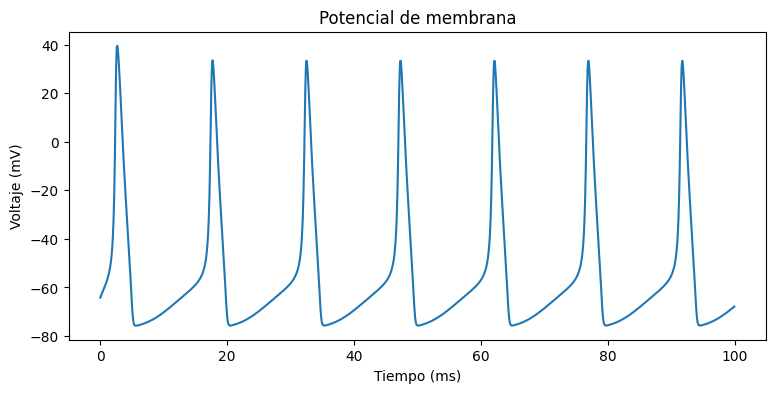

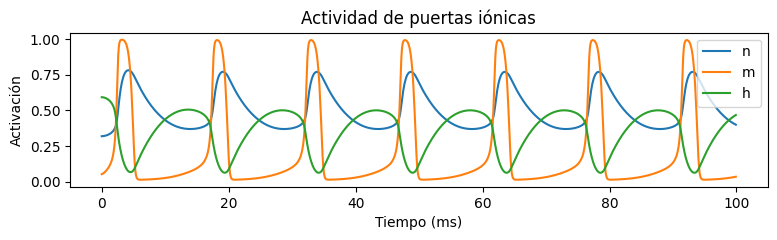

In [2]:
## Código para ejecutar el modelo
run_HH_model(gNa=120, gK=36, gL=0.03, i=10.0)

> Toma este modelo y los valores de sus parámetros como referencia para las preguntas a ser respondidas a continuación.

## Pregunta 1

Reduce el input eléctrico (parámetro `i`) de la neurona a la mitad. ¿Qué cambios observas en la dinámica del potencial de membrana? ¿Cómo se relacionan estos cambios con la actividad de las puertas iónicas? (5 puntos)

In [5]:
# Escribe tu respuesta aquí
run_HH_model(gNa=120, gK=36, gL=0.03, i=...)

## Pregunta 2

Reduce la conductancia del canal de sodio (parámetro `gNa`) a la mitad. ¿Qué cambios observas en la dinámica del voltaje de membrana? ¿Cómo se relacionan estos cambios con la actividad de las puertas iónicas? (5 puntos)

In [6]:
# Escribe tu respuesta aquí
run_HH_model(gNa=..., gK=36, gL=0.03, i=10)

## Pregunta 3

Reduce la conductancia del canal activo de potasio (parámetro `gK`) a la cuarta parte. ¿Qué cambios observas en la dinámica del voltaje de membrana? ¿Cómo se relacionan estos cambios con la actividad de las puertas iónicas? (5 puntos)

In [9]:
# Escribe tu respuesta aquí
run_HH_model(gNa=120, gK=..., gL=0.03, i=10)

## Pregunta 4

Multiplica por 20 la conductancia del canal pasivo de potasio (parámetro `gL`). ¿Qué cambios observas en la dinámica del voltaje de membrana? ¿Cómo se relacionan estos cambios con la actividad de las puertas iónicas? (5 puntos)

In [10]:
# Escribe tu respuesta aquí
run_HH_model(gNa=120, gK=36, gL=..., i=10)